<a href="https://colab.research.google.com/github/yildiz3/Deep-Learning/blob/master/Assignments/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("drive/MyDrive/csv/Churn_Modelling.csv") # , index_col="RowNumber"

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


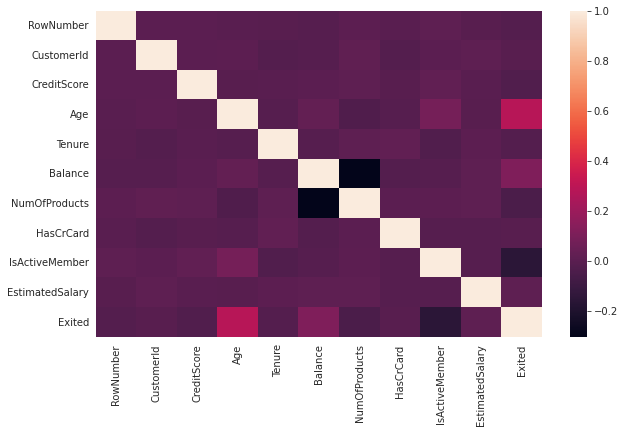

In [ ]:
sns.heatmap(df.corr());

In [ ]:
df.drop(df[["RowNumber","CustomerId", "Surname"]], axis=1,inplace=True)
#The columns 'RowNumber', 'Surname' and 'CustomerId' make the dataset unique, so we drop them.

In [ ]:
# df.hist(figsize=(15, 12), bins=15);

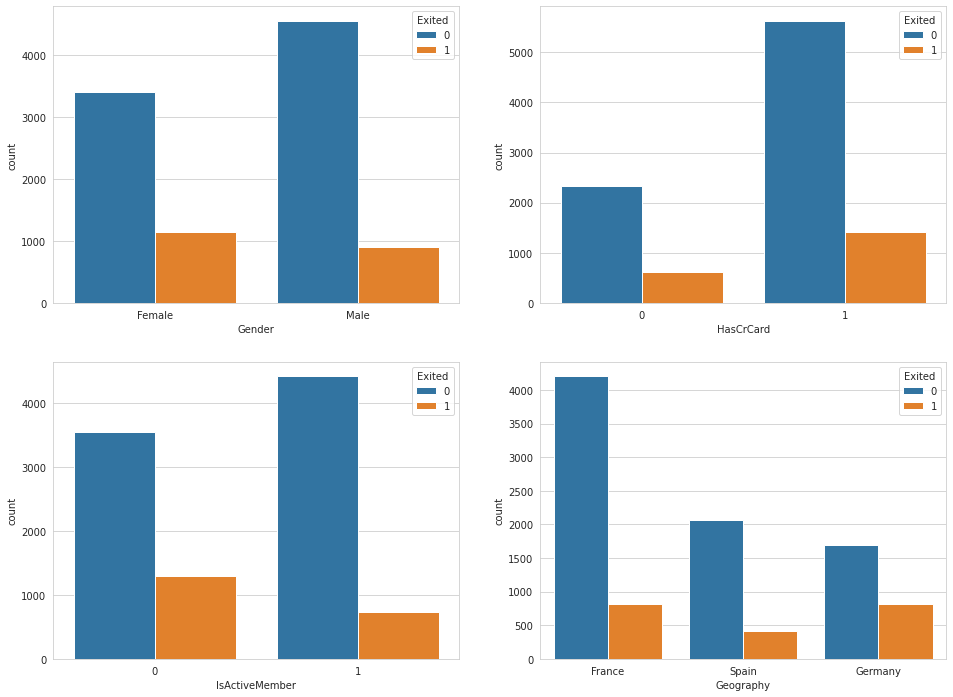

In [ ]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0

plt.figure(figsize=(16, 12))

for i in cat_list:
  index += 1
  plt.subplot(2, 2, index)
  sns.countplot(data=df, x=i, hue="Exited")

CreditScore

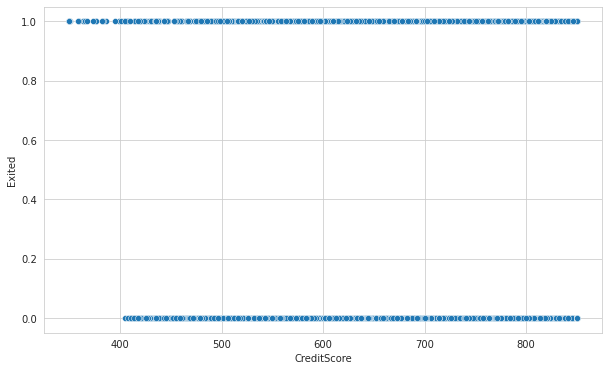

In [ ]:
sns.scatterplot(x = 'CreditScore', y = 'Exited', data = df);

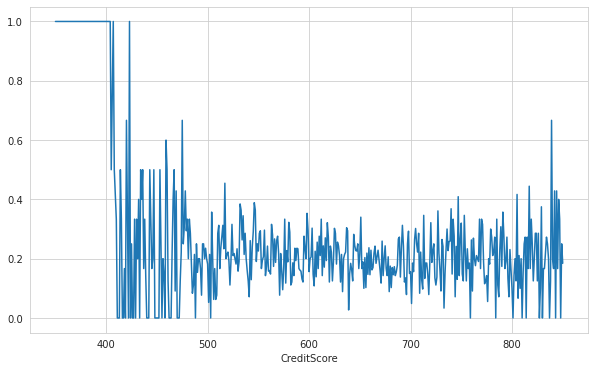

In [ ]:
df.groupby('CreditScore')['Exited'].mean().plot();

Geography

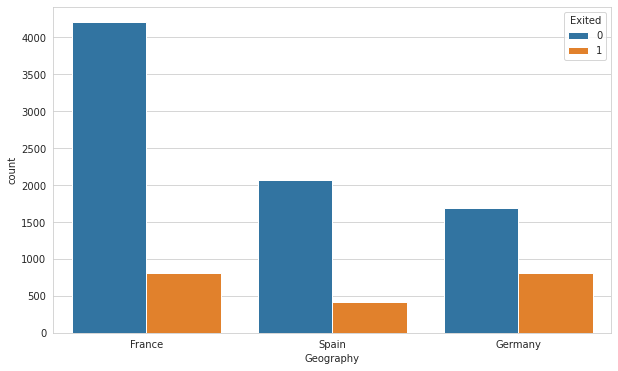

In [ ]:
sns.countplot(x='Geography', data=df, hue='Exited');

Gender

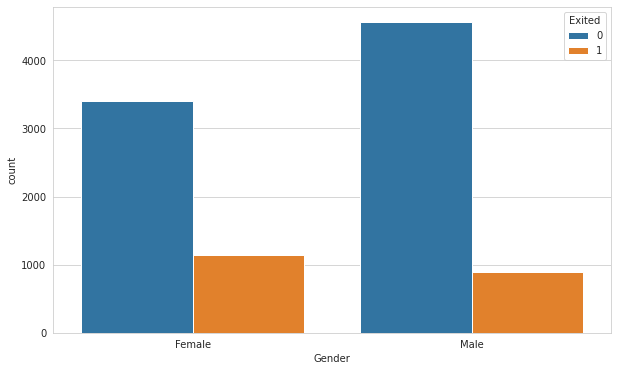

In [ ]:
sns.countplot(x='Gender', data=df, hue='Exited');

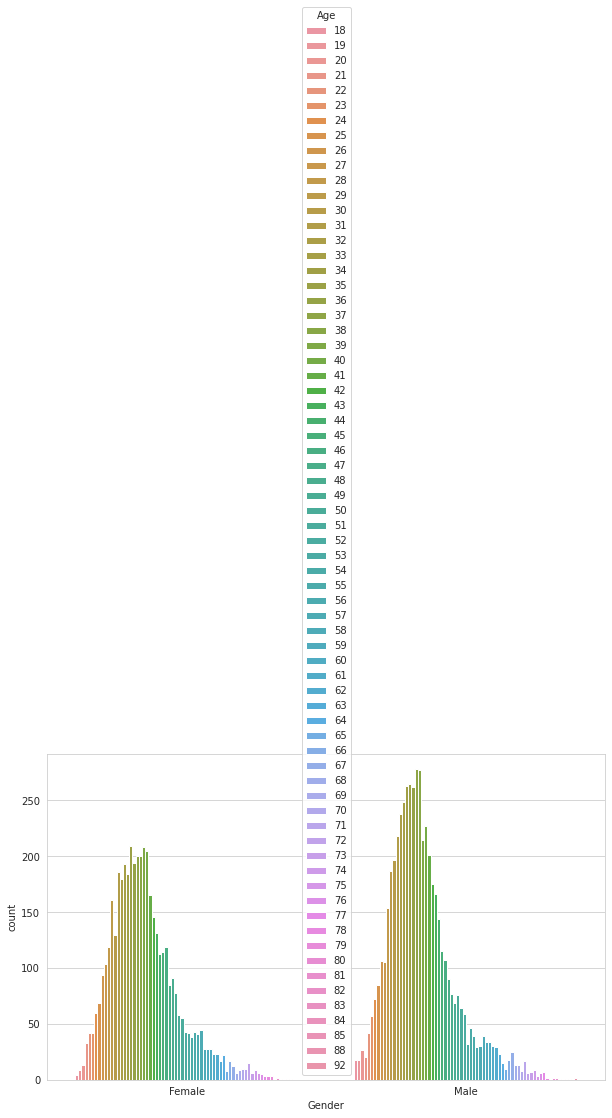

In [ ]:
sns.countplot(x='Gender', data=df, hue='Age', orient='h');

Age

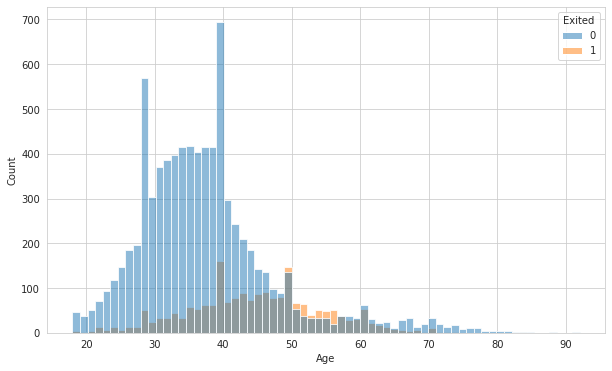

In [ ]:
sns.histplot(x='Age', data=df, hue='Exited');

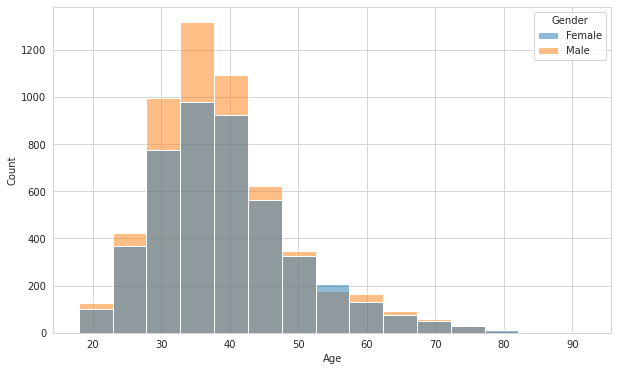

In [ ]:
sns.histplot(x='Age', data=df, hue='Gender', bins=15);

In [ ]:
"""
cond1 = (df['Age'] < 18)
cond2 = ((df['Age'] >= 18) & (df['Age'] < 23))
cond3 = ((df['Age'] >= 23) & (df['Age'] < 40))
cond4 = ((df['Age'] >= 40) & (df['Age'] < 55))
cond5 = ((df['Age'] >= 55) & (df['Age'] < 65))
cond6 = ((df['Age'] >= 65) & (df['Age'] < 75))
cond7 = (df['Age'] >= 75)

df['Age_Group'] = df.loc[cond1,'Age'].replace('-',0)
df['Age_Group'] = df.loc[cond2,'Age'].replace('-',1)
df['Age_Group'] = df.loc[cond3,'Age'].replace('-',2)
df['Age_Group'] = df.loc[cond4,'Age'].replace('-',3)
df['Age_Group'] = df.loc[cond5,'Age'].replace('-',4)
df['Age_Group'] = df.loc[cond6,'Age'].replace('-',5)
df['Age_Group'] = df.loc[cond7,'Age'].replace('-',6)
"""

"\ncond1 = (df['Age'] < 18)\ncond2 = ((df['Age'] >= 18) & (df['Age'] < 23))\ncond3 = ((df['Age'] >= 23) & (df['Age'] < 40))\ncond4 = ((df['Age'] >= 40) & (df['Age'] < 55))\ncond5 = ((df['Age'] >= 55) & (df['Age'] < 65))\ncond6 = ((df['Age'] >= 65) & (df['Age'] < 75))\ncond7 = (df['Age'] >= 75)\n\ndf['Age_Group'] = df.loc[cond1,'Age'].replace('-',0)\ndf['Age_Group'] = df.loc[cond2,'Age'].replace('-',1)\ndf['Age_Group'] = df.loc[cond3,'Age'].replace('-',2)\ndf['Age_Group'] = df.loc[cond4,'Age'].replace('-',3)\ndf['Age_Group'] = df.loc[cond5,'Age'].replace('-',4)\ndf['Age_Group'] = df.loc[cond6,'Age'].replace('-',5)\ndf['Age_Group'] = df.loc[cond7,'Age'].replace('-',6)\n"

Tenure

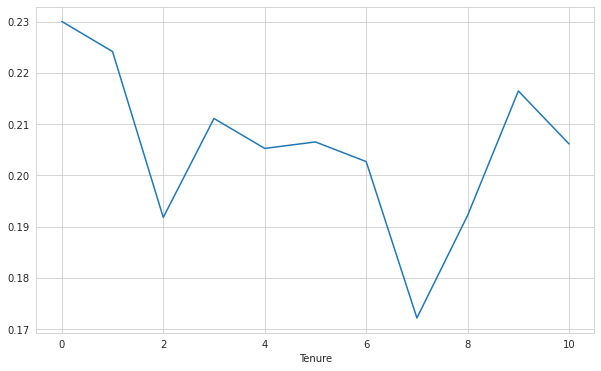

In [ ]:
df.groupby('Tenure')['Exited'].mean().plot();

Balance

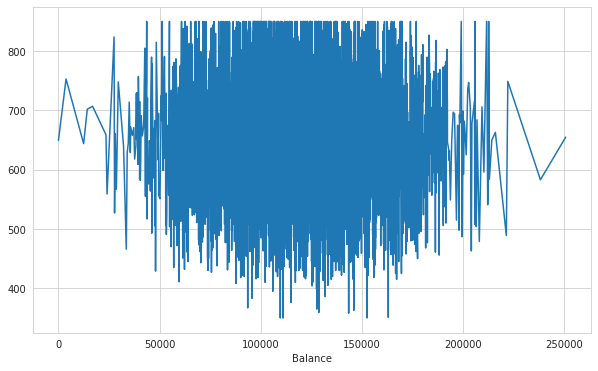

In [ ]:
df.groupby('Balance')['CreditScore'].mean().plot();

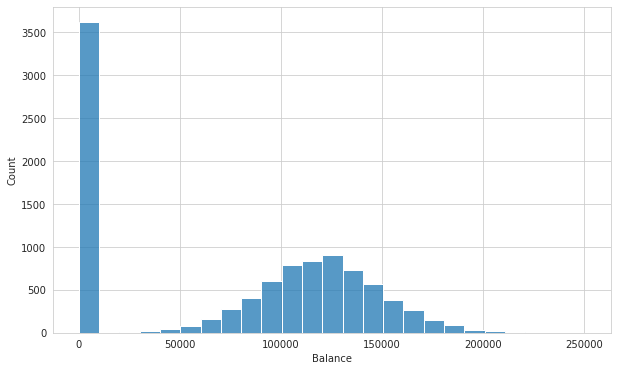

In [ ]:
sns.histplot(x='Balance', data=df, bins=25);

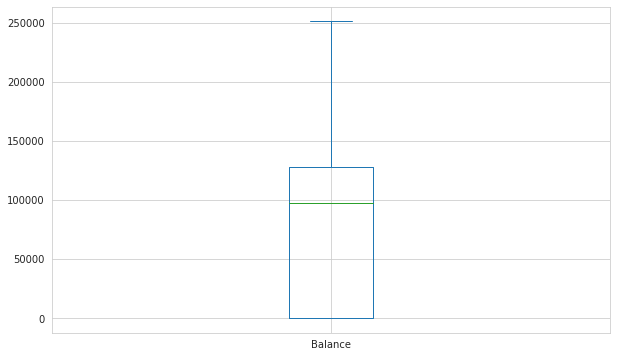

In [ ]:
df.Balance.plot(kind="box", );

NumOfProducts

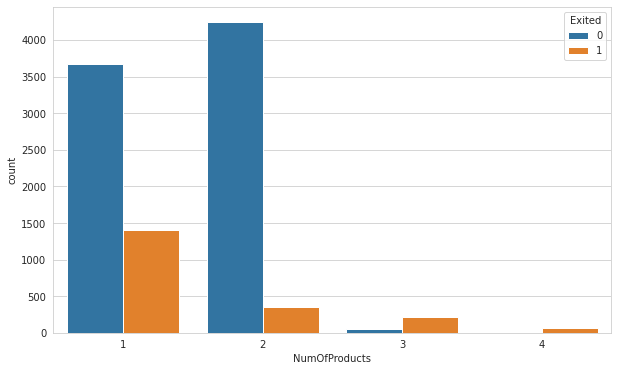

In [ ]:
sns.countplot(x='NumOfProducts', data=df, hue='Exited');

HasCrCard

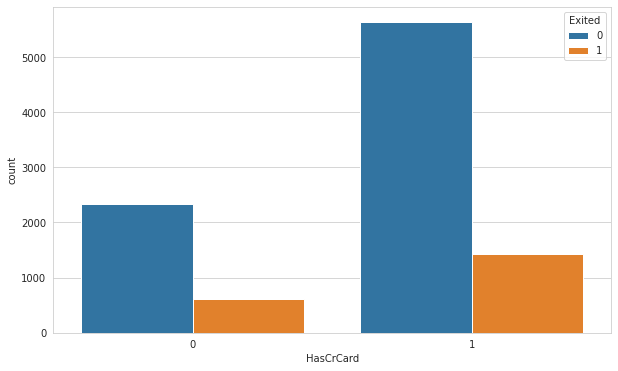

In [ ]:
sns.countplot(x='HasCrCard', data=df, hue='Exited');

IsActiveMember

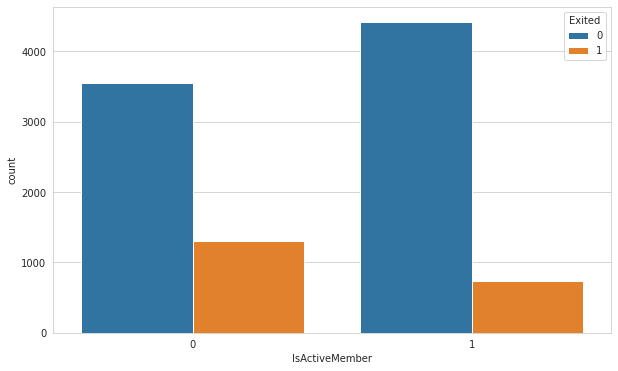

In [ ]:
sns.countplot(x='IsActiveMember', data=df, hue='Exited');

EstimatedSalary

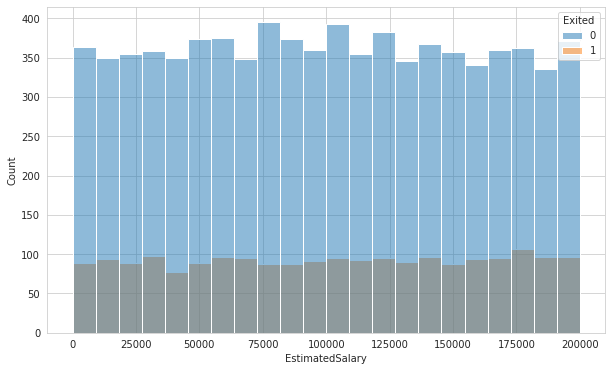

In [ ]:
sns.histplot(x='EstimatedSalary', data=df, hue='Exited');

Exited

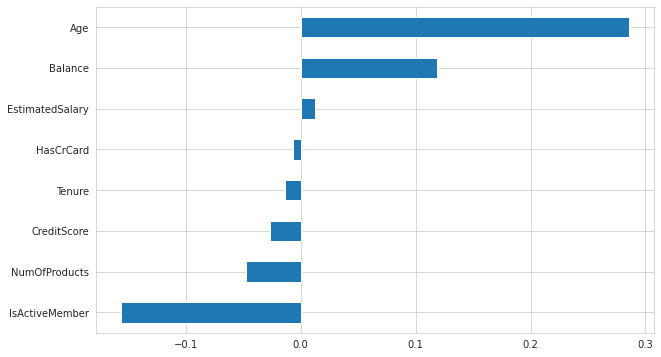

In [ ]:
df.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh');

Latest Data

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
seed = 101

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
X_train.shape

(9000, 11)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=["Recall"])  # We use Recall when dataset has imbalanced data

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
60/60 [==============================] - 1s 6ms/step - loss: 0.6736 - recall: 0.3078 - val_loss: 0.5621 - val_recall: 0.0000e+00
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5203 - recall: 0.0000e+00 - val_loss: 0.5040 - val_recall: 0.0000e+00
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4898 - recall: 0.0000e+00 - val_loss: 0.4870 - val_recall: 0.0000e+00
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4736 - recall: 6.4392e-04 - val_loss: 0.4739 - val_recall: 0.0179
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4621 - recall: 0.0406 - val_loss: 0.4640 - val_recall: 0.1036
Epoch 6/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4524 - recall: 0.1256 - val_loss: 0.4517 - val_recall: 0.1571
Epoch 7/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4429 - recall: 0.1835 - val_loss: 0.4405 - val_recall: 0.1786
Epoch 8/300
60/60

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 20) dtype=float32, numpy=
 array([[-2.83585619e-02, -1.12906903e-01, -4.78981733e-01,
         -2.44746521e-01,  8.37650746e-02,  2.58612067e-01,
          4.84405279e-01,  7.34094828e-02, -6.60044476e-02,
          8.15576389e-02, -2.88587548e-02,  2.40586817e-01,
          4.98891503e-01, -5.09099662e-01,  1.40700758e-01,
         -6.59858286e-02, -2.00974494e-01,  2.00180307e-01,
          1.64601982e-01, -6.51236698e-02],
        [-8.61565918e-02,  7.31274784e-02,  1.28278410e+00,
         -2.33761236e-01, -5.87299109e-01, -3.69350426e-02,
          2.31838599e-01,  2.38722369e-01, -4.75423843e-01,
          4.54061389e-01,  1.11068308e-03,  3.73336710e-02,
         -1.06033109e-01,  3.55305165e-01,  1.03397632e+00,
          2.93373168e-01, -9.43123579e-01, -4.42491204e-01,
         -1.29640257e+00,  7.11121082e-01],
        [-4.02289242e-01, -9.27172527e-02,  1.81365103e-01,
          2.38218601e-03, -4.85861227e-02,  5.72425902e-01,
    

In [ ]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.674,0.308,0.562,0.000
1,0.520,0.000,0.504,0.000
2,0.490,0.000,0.487,0.000
3,0.474,0.001,0.474,0.018
4,0.462,0.041,0.464,0.104
...,...,...,...,...
295,0.313,0.511,0.327,0.521
296,0.316,0.522,0.330,0.575
297,0.315,0.518,0.326,0.525
298,0.314,0.516,0.330,0.571


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


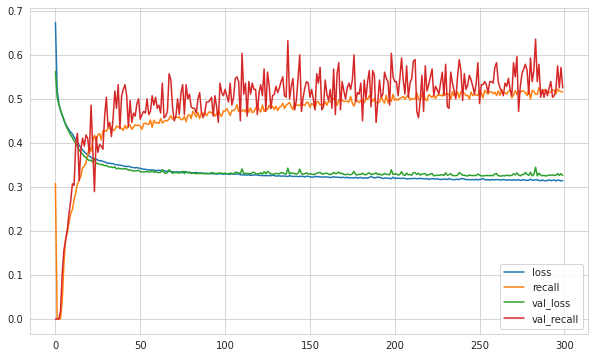

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [121  83]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.70      0.41      0.52       204

    accuracy                           0.84      1000
   macro avg       0.78      0.68      0.71      1000
weighted avg       0.83      0.84      0.83      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.37375354766845703, 0.406862735748291]

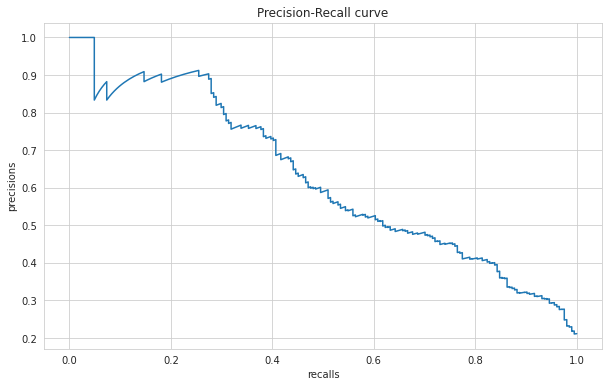

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6253529345330605

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6899 - recall: 0.7494 - val_loss: 0.7057 - val_recall: 0.7563
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6503 - recall: 0.6932 - val_loss: 0.6674 - val_recall: 0.7259
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6210 - recall: 0.6571 - val_loss: 0.6567 - val_recall: 0.7614
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6031 - recall: 0.6534 - val_loss: 0.6039 - val_recall: 0.7310
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5898 - recall: 0.6693 - val_loss: 0.5796 - val_recall: 0.7208
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5789 - recall: 0.6858 - val_loss: 0.5759 - val_recall: 0.7411
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5705 - recall: 0.6938 - val_loss: 0.5912 - val_recall: 0.7766
Epoch 8/300
64/64 [======================

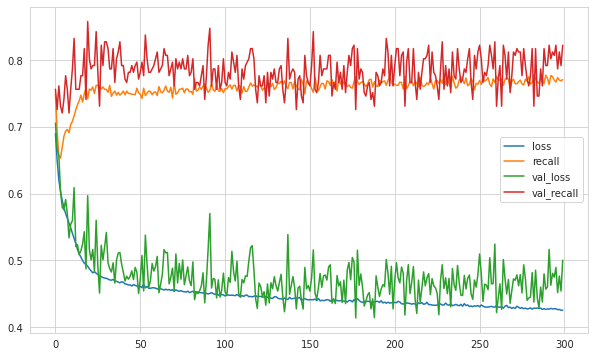

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[592 204]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       796
           1       0.44      0.77      0.56       204

    accuracy                           0.75      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.75      0.77      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

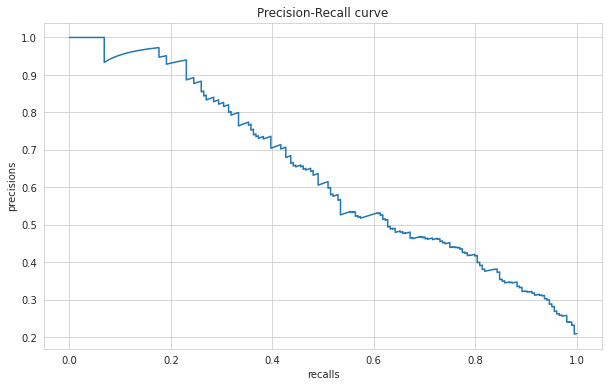

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
from sklearn.metrics._plot.precision_recall_curve import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.6390968352628615

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005) 
model.compile(optimizer = opt, 
              loss = 'binary_crossentropy', 
              metrics=["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6700 - recall: 0.4419 - val_loss: 0.6718 - val_recall: 0.7259
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6018 - recall: 0.6479 - val_loss: 0.5622 - val_recall: 0.6802
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5719 - recall: 0.6852 - val_loss: 0.5639 - val_recall: 0.7868
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5399 - recall: 0.7103 - val_loss: 0.4536 - val_recall: 0.5584
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5082 - recall: 0.7243 - val_loss: 0.5285 - val_recall: 0.7919
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4965 - recall: 0.7329 - val_loss: 0.5512 - val_recall: 0.8071
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4836 - recall: 0.7341 - val_loss: 0.5532 - val_recall: 0.8325
Epoch 8/300
64/64 [======================

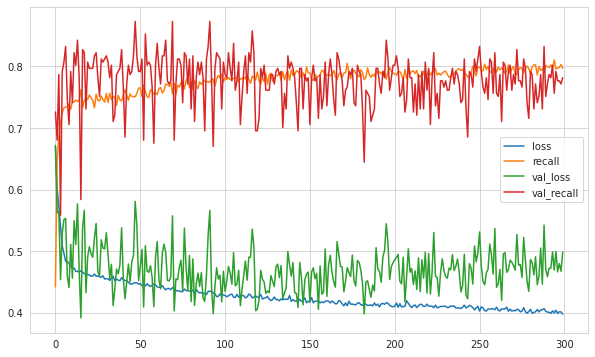

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[603 193]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       796
           1       0.44      0.75      0.56       204

    accuracy                           0.76      1000
   macro avg       0.68      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 300, 
          verbose = 1, 
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.7005 - recall: 0.3081 - val_loss: 0.6908 - val_recall: 0.4619
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6880 - recall: 0.3050 - val_loss: 0.6906 - val_recall: 0.4924
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6886 - recall: 0.2769 - val_loss: 0.6894 - val_recall: 0.5381
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6839 - recall: 0.2787 - val_loss: 0.6852 - val_recall: 0.5127
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6821 - recall: 0.3093 - val_loss: 0.6829 - val_recall: 0.5787
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6818 - recall: 0.3197 - val_loss: 0.6781 - val_recall: 0.5736
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6783 - recall: 0.3655 - val_loss: 0.6787 - val_recall: 0.6396
Epoch 8/300
64/64 [======================

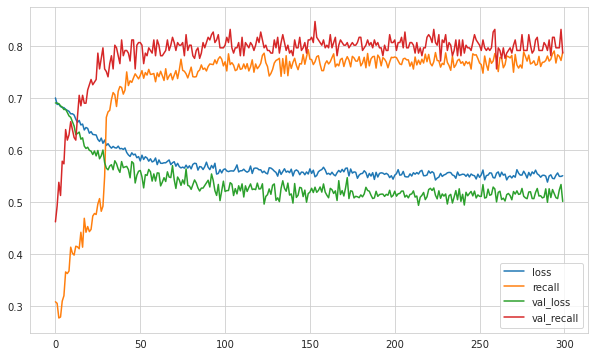

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5231199264526367
accuracy :  0.7549019455909729


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[574 222]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       796
           1       0.41      0.75      0.53       204

    accuracy                           0.73      1000
   macro avg       0.66      0.74      0.67      1000
weighted avg       0.82      0.73      0.75      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer = opt, 
              loss = "binary_crossentropy", 
              metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)

In [ ]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 300, 
          verbose = 1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 9ms/step - loss: 0.6702 - recall: 0.5202 - val_loss: 0.6211 - val_recall: 0.6244
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6335 - recall: 0.5782 - val_loss: 0.6204 - val_recall: 0.7411
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6008 - recall: 0.6430 - val_loss: 0.5606 - val_recall: 0.7868
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5823 - recall: 0.6485 - val_loss: 0.6023 - val_recall: 0.8782
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5585 - recall: 0.6938 - val_loss: 0.5021 - val_recall: 0.6904
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5347 - recall: 0.6999 - val_loss: 0.5226 - val_recall: 0.7970
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5288 - recall: 0.7097 - val_loss: 0.5341 - val_recall: 0.8071
Epoch 8/300
64/64 [======================

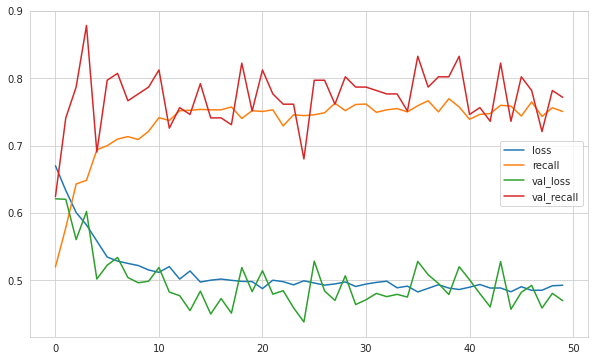

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.45833539962768555
accuracy :  0.6225489974021912


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[651 145]
 [ 77 127]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       796
           1       0.47      0.62      0.53       204

    accuracy                           0.78      1000
   macro avg       0.68      0.72      0.69      1000
weighted avg       0.81      0.78      0.79      1000



#### Monitor the "val_recall" as metric

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer = opt, 
              loss = "binary_crossentropy", 
              metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "max", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose = 1,
          callbacks = [early_stop], class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6702 - recall: 0.5202 - val_loss: 0.6211 - val_recall: 0.6244
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6335 - recall: 0.5782 - val_loss: 0.6204 - val_recall: 0.7411
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6008 - recall: 0.6430 - val_loss: 0.5606 - val_recall: 0.7868
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5823 - recall: 0.6485 - val_loss: 0.6023 - val_recall: 0.8782
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5585 - recall: 0.6938 - val_loss: 0.5021 - val_recall: 0.6904
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5347 - recall: 0.6999 - val_loss: 0.5226 - val_recall: 0.7970
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5288 - recall: 0.7097 - val_loss: 0.5341 - val_recall: 0.8071
Epoch 8/300
64/64 [======================

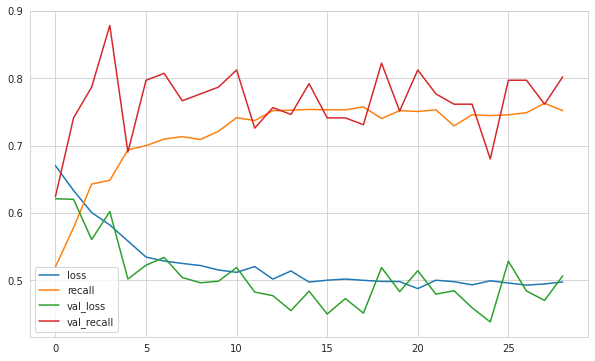

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6165176630020142
accuracy :  0.8284313678741455


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[475 321]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.93      0.60      0.73       796
           1       0.34      0.83      0.49       204

    accuracy                           0.64      1000
   macro avg       0.64      0.71      0.61      1000
weighted avg       0.81      0.64      0.68      1000



## GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
seed = 42

In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    model.add(Dropout(0.2))
    classifier.add(Dense(units = 10, activation = 'relu'))
    model.add(Dropout(0.2))
    classifier.add(Dense(units = 5, activation = 'relu'))
    model.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [ ]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 1s 11ms/step - loss: 0.6859 - recall: 0.9291 - val_loss: 0.7129 - val_recall: 0.9239
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6858 - recall: 0.9279 - val_loss: 0.7127 - val_recall: 0.9188
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - recall: 0.9273 - val_loss: 0.7124 - val_recall: 0.9188
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6857 - recall: 0.9242 - val_loss: 0.7122 - val_recall: 0.9188
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6856 - recall: 0.9230 - val_loss: 0.7120 - val_recall: 0.9188
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - recall: 0.9211 - val_loss: 0.7118 - val_recall: 0.9137
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - recall: 0.9205 - val_loss: 0.7116

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f092e1211d0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [ ]:
grid_model.best_score_

0.929097407405278

In [ ]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adadelta.Adadelta}

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 73 723]
 [ 13 191]]
              precision    recall  f1-score   support

           0       0.85      0.09      0.17       796
           1       0.21      0.94      0.34       204

    accuracy                           0.26      1000
   macro avg       0.53      0.51      0.25      1000
weighted avg       0.72      0.26      0.20      1000



In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
18,0.929,0.012,1,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
22,0.929,0.012,2,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
14,0.928,0.012,3,"{'batch_size': 256, 'learn_rate': 0.001, 'opti..."
6,0.928,0.013,4,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
10,0.925,0.012,5,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
21,0.898,0.039,6,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
23,0.889,0.035,7,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
17,0.878,0.027,8,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
19,0.875,0.033,9,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
9,0.871,0.047,10,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."


In [ ]:
for i in grid_result["params"]:
  print(i)

{'batch_size': 256, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}
{'batch_size': 256, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}
{'batch_size': 256, 'learn_rate': 0.001, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}
{'batch_size': 128, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}
{'batch_size': 128, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}
{'batch_size': 256, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}
{'batch_size': 256, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}
{'batch_size': 256, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}
{'batch_size': 256, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}
{'batch_size': 128, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

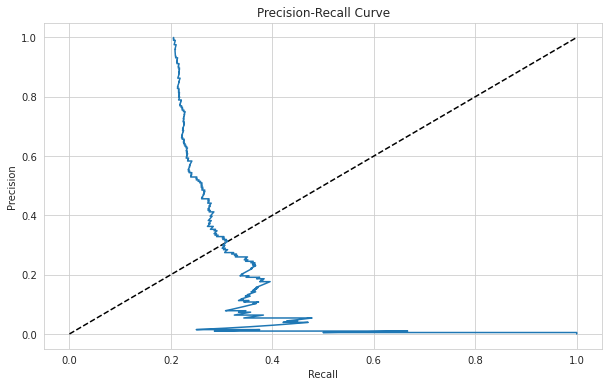

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precisions, recalls, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.28149775705380364

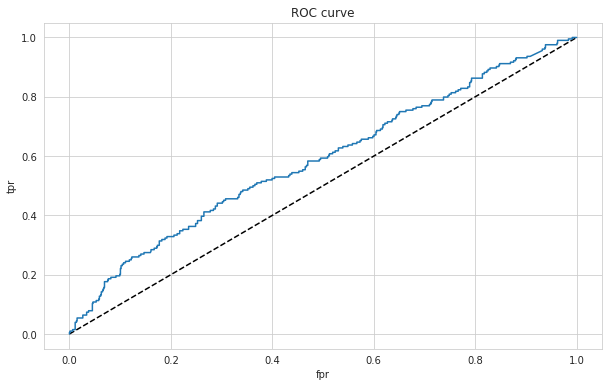

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')  # False Positive Rate
plt.ylabel('tpr')  # True Positive Rate
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.5854671642526357

# Final Model and Model Deployment

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_churn.pkl", 'wb'))

In [ ]:
tf.random.set_seed(42)

model_final = Sequential()

model_final.add(Dense(10, activation = "relu", input_dim = X_train.shape[1]))
model_final.add(Dense(5, activation = "relu"))
model_final.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr = 0.005)
model_final.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model_final.fit(x = X, y = y, validation_data = (X_test, y_test), batch_size = 128, epochs = 200, verbose = 1,
          callbacks = [early_stop], class_weight=class_weights)

Epoch 1/200
79/79 [==============================] - 1s 5ms/step - loss: 2259.1274 - recall: 0.4507 - val_loss: 0.8840 - val_recall: 1.0000
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 734.9556 - recall: 0.5174 - val_loss: 0.8371 - val_recall: 1.0000
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 655.2164 - recall: 0.5091 - val_loss: 0.8258 - val_recall: 1.0000
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 567.6227 - recall: 0.5125 - val_loss: 0.8056 - val_recall: 1.0000
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 510.3338 - recall: 0.5263 - val_loss: 0.8088 - val_recall: 1.0000
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 500.9407 - recall: 0.5214 - val_loss: 0.7709 - val_recall: 0.9706
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 475.3473 - recall: 0.5076 - val_loss: 0.7677 - val_recall: 0.9657
Epoch 8/200
79/79 [=======

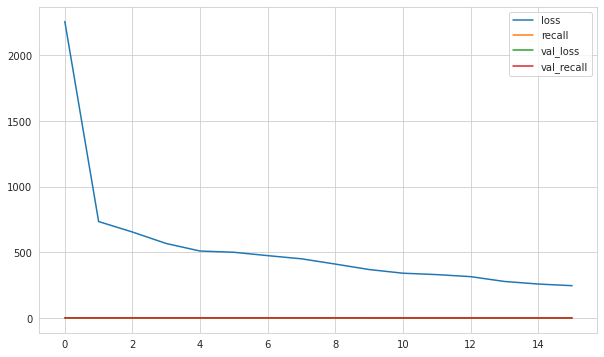

In [ ]:
loss_df = pd.DataFrame(model_final.history.history)
loss_df.plot();

In [ ]:
y_pred = model_final.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0 796]
 [  0 204]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.10      0.50      0.17      1000
weighted avg       0.04      0.20      0.07      1000



In [ ]:
model_final.save('model_churn.h5')

## Prediction

In [ ]:
single_customer = df.drop("Exited", axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [ ]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50678999, 0.        , 0.        ,
        0.        ]])

In [ ]:
model_final.predict(single_customer)

array([[0.6176313]], dtype=float32)

In [ ]:
df["Exited"].iloc[0]

1

Predict using manual input data

In [ ]:
# from tensorflow.keras.models import load_model

In [ ]:
# model_churn = load_model('model_churn.h5')
# scaler_churn = pickle.load(open("scaler_churn.pkl", "rb"))

In [ ]:
"""
my_dict = {
    'CreditScore':520,
    'Geography':'France',
    'Gender': 'Female',
    'Age': 48,
    'Tenure' : 8,
    'Balance' : 150000.00,
    'NumOfProducts': 2,
    'HasCrCard' : 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 55000.00
}
"""

"\nmy_dict = {\n    'CreditScore':520,\n    'Geography':'France',\n    'Gender': 'Female',\n    'Age': 48,\n    'Tenure' : 8,\n    'Balance' : 150000.00,\n    'NumOfProducts': 2,\n    'HasCrCard' : 1,\n    'IsActiveMember': 0,\n    'EstimatedSalary': 55000.00\n}\n"

In [ ]:
# df_ex = pd.DataFrame(my_dict, index = [1])
# df_ex

In [ ]:
# df_ex_dummy = pd.get_dummies(df_ex).reindex(columns=df_dummy.drop('Exited',axis=1).columns, fill_value=0)
# df_ex_dummy

In [ ]:
# (model_churn.predict(df_ex_dummy) > 0.5).astype("int32")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___